In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
import yfinance as yf
from prophet.plot import plot_plotly, plot_components_plotly

In [2]:
Getdata = yf.Ticker("TITN")
# Valid options are 1d, 5d, 1mo, 3mo, 6mo, 1y,
# 2y, 5y, 10y and ytd.
data=pd.DataFrame(Getdata.history(period="5y"))
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-04-02 00:00:00-04:00,15.900000,15.950000,15.500000,15.690000,185300,0.0,0.0
2019-04-03 00:00:00-04:00,15.740000,16.320000,15.740000,16.059999,267700,0.0,0.0
2019-04-04 00:00:00-04:00,16.059999,17.070000,15.990000,16.700001,270900,0.0,0.0
2019-04-05 00:00:00-04:00,16.770000,16.950001,16.559999,16.799999,246000,0.0,0.0
2019-04-08 00:00:00-04:00,16.680000,17.209999,16.660000,17.110001,167100,0.0,0.0


In [3]:
data.reset_index(inplace=True)

In [4]:
import datetime

# Convert the 'Date' column to datetime objects
data['Date'] = pd.to_datetime(data['Date'])

# Split the 'Date' column into 'date' and 'time' columns
data['date'] = data['Date'].dt.date
data['time'] = data['Date'].dt.time

# Drop the original 'Date' column
data.drop('Date', axis=1, inplace=True)

# Display the updated DataFrame
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,time
0,15.900000,15.950000,15.500000,15.690000,185300,0.0,0.0,2019-04-02,00:00:00
1,15.740000,16.320000,15.740000,16.059999,267700,0.0,0.0,2019-04-03,00:00:00
2,16.059999,17.070000,15.990000,16.700001,270900,0.0,0.0,2019-04-04,00:00:00
3,16.770000,16.950001,16.559999,16.799999,246000,0.0,0.0,2019-04-05,00:00:00
4,16.680000,17.209999,16.660000,17.110001,167100,0.0,0.0,2019-04-08,00:00:00


In [5]:
#df = pd.read_csv('TSLA.csv')
#df.head()

In [6]:
# add two columnsin dataframe having values as Date and Adj Close
data[['ds', 'y']] = data[['date', 'High']]
# Subset two columns from data frame
df = data[['ds', 'y']]

df.head()

,ds,y
0,2019-04-02,15.950000
1,2019-04-03,16.320000
2,2019-04-04,17.070000
3,2019-04-05,16.950001
4,2019-04-08,17.209999


In [7]:
test_size = 90
df_train = df[:-test_size]
df_test = df[-test_size:]

In [8]:
df_train

,ds,y
0,2019-04-02,15.950000
1,2019-04-03,16.320000
2,2019-04-04,17.070000
3,2019-04-05,16.950001
4,2019-04-08,17.209999
...,...,...
1163,2023-11-13,25.469999
1164,2023-11-14,26.549999
1165,2023-11-15,26.740000
1166,2023-11-16,26.500000


In [9]:
# Instantiate prophet
model = Prophet()

# fit the training data
model.fit(df_train)

14:16:08 - cmdstanpy - INFO - Chain [1] start processing
14:16:09 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
forecastt= model.predict(df_test)
forecastt

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-11-20,26.445123,26.202121,31.449689,26.445123,26.445123,2.419373,2.419373,2.419373,0.701619,0.701619,0.701619,1.717753,1.717753,1.717753,0.0,0.0,0.0,28.864495
1,2023-11-21,26.410863,26.411346,31.711343,26.410863,26.410863,2.544094,2.544094,2.544094,0.688500,0.688500,0.688500,1.855594,1.855594,1.855594,0.0,0.0,0.0,28.954958
2,2023-11-22,26.376604,26.377128,31.762130,26.376604,26.376604,2.669322,2.669322,2.669322,0.687951,0.687951,0.687951,1.981370,1.981370,1.981370,0.0,0.0,0.0,29.045926
3,2023-11-24,26.308086,26.434077,31.631458,26.308086,26.308086,2.811435,2.811435,2.811435,0.620448,0.620448,0.620448,2.190987,2.190987,2.190987,0.0,0.0,0.0,29.119521
4,2023-11-27,26.205309,26.546989,31.982860,26.205309,26.205309,3.087309,3.087309,3.087309,0.701619,0.701619,0.701619,2.385689,2.385689,2.385689,0.0,0.0,0.0,29.292618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2024-03-25,22.128483,18.324200,25.877178,19.548855,24.706487,-0.035530,-0.035530,-0.035530,0.701619,0.701619,0.701619,-0.737149,-0.737149,-0.737149,0.0,0.0,0.0,22.092953
86,2024-03-26,22.094224,18.193794,25.935582,19.458526,24.741027,-0.223779,-0.223779,-0.223779,0.688500,0.688500,0.688500,-0.912279,-0.912279,-0.912279,0.0,0.0,0.0,21.870445
87,2024-03-27,22.059965,17.758002,25.254183,19.381228,24.773409,-0.388052,-0.388052,-0.388052,0.687951,0.687951,0.687951,-1.076003,-1.076003,-1.076003,0.0,0.0,0.0,21.671913
88,2024-03-28,22.025706,17.421846,25.552094,19.269235,24.776463,-0.547477,-0.547477,-0.547477,0.679953,0.679953,0.679953,-1.227430,-1.227430,-1.227430,0.0,0.0,0.0,21.478229


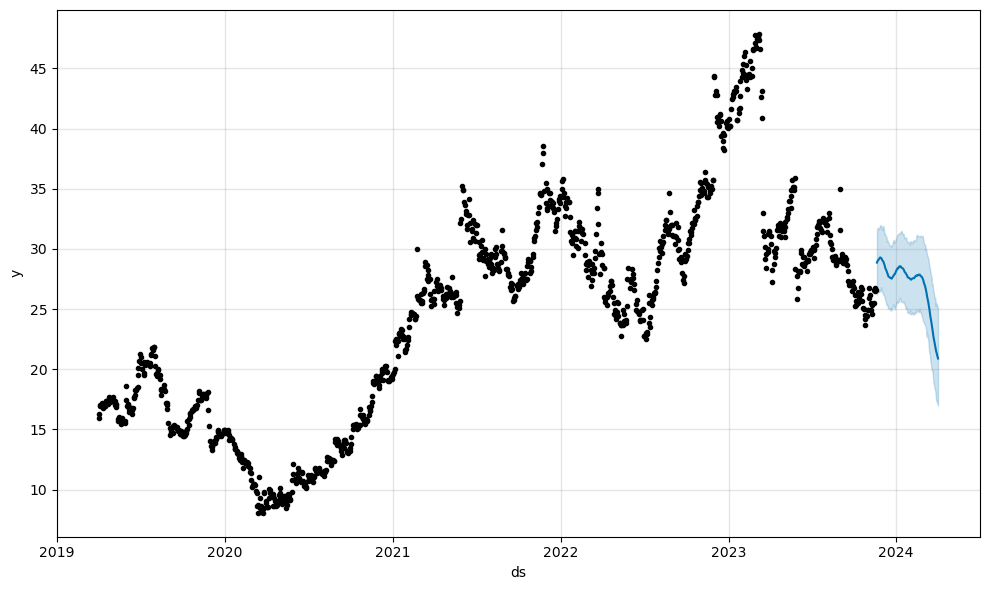

In [11]:
models=model.plot(forecastt)

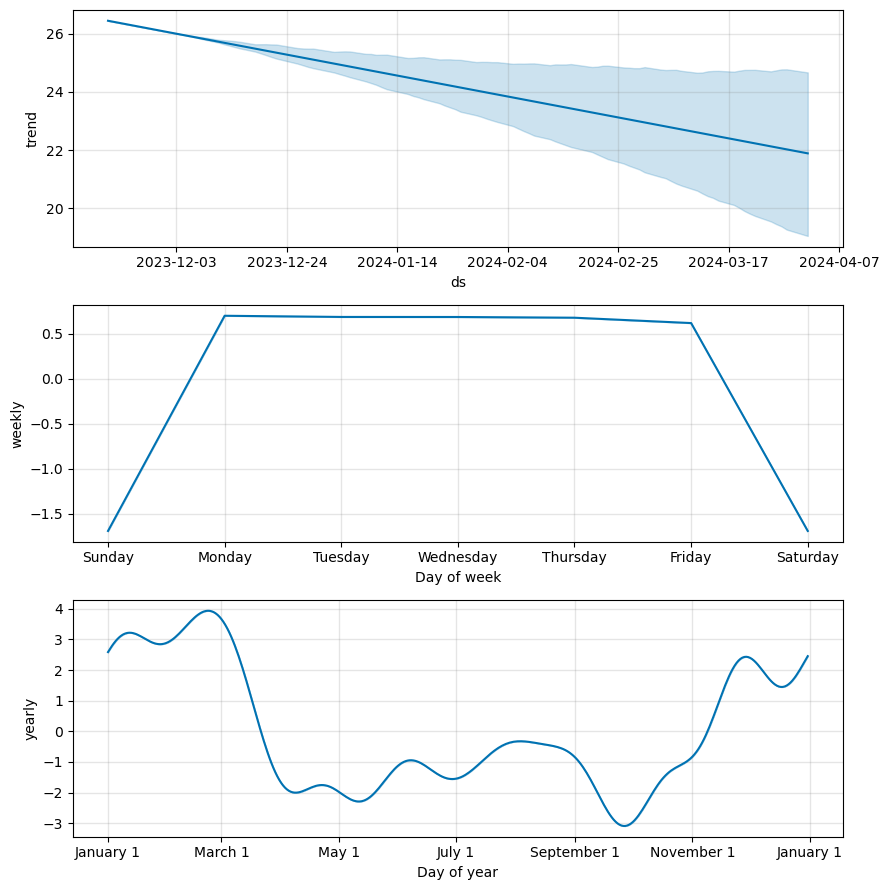

In [12]:
# plot graphs of different components:
m = model.plot_components(forecastt)

In [17]:
# Plot the results
#plot_plotly(model, forecastt)

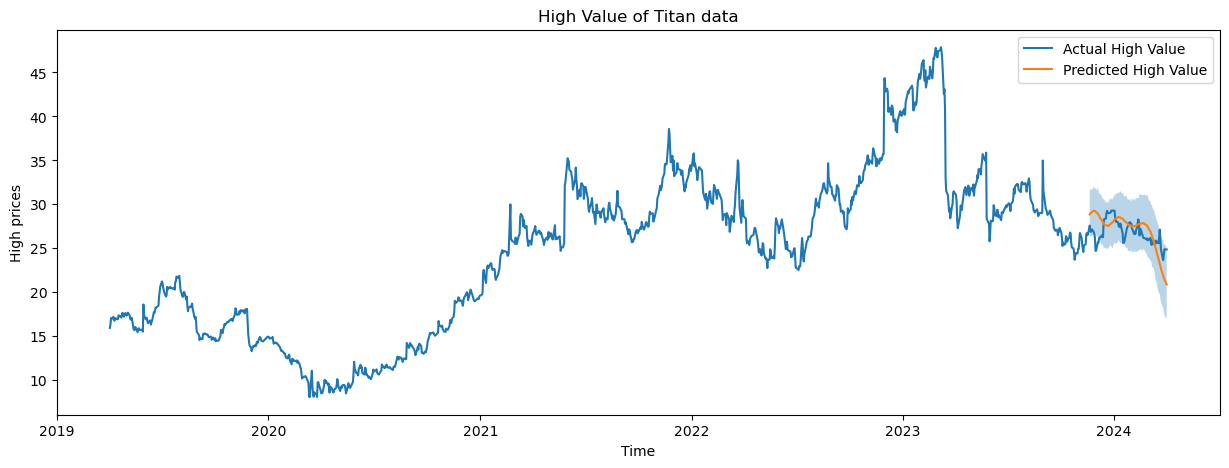

In [16]:
plt.figure(figsize=(15,5))
plt.plot(df.ds,df.y,label='Actual High Value')
plt.plot(df.ds[-test_size:],forecastt.yhat,label='Predicted High Value')
plt.fill_between(df.ds[-test_size:],forecastt.yhat_lower,forecastt.yhat_upper,alpha=0.3,)
plt.xlabel('Time')
plt.ylabel('High prices')
plt.title('High Value of Titan data')
plt.legend()

In [27]:
y=df_test.y.values
p=forecastt.yhat
mse = np.mean((y-p)**2)
print(f'Mean squared error is: {mse}')

Mean squared error is: 3.1723077961272326
